In [1]:
%pip install --force-reinstall --no-cache-dir tensorflow
%pip install --force-reinstall --no-cache-dir keras

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/377.0 MB 6.5 MB/s eta 0:00:59
   ---------------------------------------- 0.7/377.0 MB 7.7 MB/s eta 0:00:49
   ---------------------------------------- 1.3/377.0 MB 9.2 MB/s eta 0:00:41
   ---------------------------------------- 1.8/377.0 MB 9.8 MB/s eta 0:00:39
   ---------------------------------------- 2.4/377.0 MB 10.2 MB/s eta 0:00:37
   ---------------------------------------- 3.0/377.0 MB 10.5 MB/s eta 0:00:36
   ---------------------------------------- 3.5/377.0 MB 10.7 MB/s eta 0:00:35
   ---------------------------------------- 4.1/377.0 MB 10.8 MB/s eta 0:00:

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.1 MB 6.3 MB/s eta 0:00:01
   ----------------------------- ---------- 0.8/1.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.0 MB 10.7 MB/s eta 0:00:01
   -------------- ------------------------- 1.1/3.0 MB 11.3 MB/s eta 0:00:01
   --------------------- -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.4.0 which is incompatible.


In [2]:
%pip install -U tensorflow

  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl (127 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv("input/spamorham.csv")

# Preprocessing the data

In [6]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(20348, 2)
(20348, 2)


In [7]:
df.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [8]:
df['text_type'].value_counts()

text_type
ham     14337
spam     6011
Name: count, dtype: int64

### text preproc.

In [9]:
spec_c = [".", ",", "?", "!"]
for c in spec_c:
    df['text'] = df['text'].replace(c, " " + c)

In [10]:
le = LabelEncoder()
df['text_type'] = le.fit_transform(df['text_type'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['text_type'], test_size=0.2, random_state=42)

In [12]:
tokenizer = Tokenizer(filters='"#$%&()*+-/:;<=>@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(list(X_train))

sequences = tokenizer.texts_to_sequences(X_train)

print(f'''word categories count: {len(sequences[0])}
unique words count: {len(tokenizer.word_index)}
first line's window size: {len(tokenizer.texts_to_sequences([list(X_train)[0]])[0])}''')

word categories count: 13
unique words count: 57636
first line's window size: 13


In [13]:
max_sequence_length = max(len(seq) for seq in sequences)
print(max_sequence_length)

196


In [14]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [15]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense, GRU, LSTM, Conv1D, Dropout, Embedding, GlobalAveragePooling1D

In [16]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 64, input_length=max_sequence_length))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(GRU(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy','precision','recall'])

model.summary()

w:\__Projects__\Deep-Learning-Experiments\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=60, validation_data=(X_test_pad, y_test))

Epoch 1/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 47s 157ms/step - accuracy: 0.7010 - loss: 0.6212 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.7192 - val_loss: 0.5170 - val_precision: 1.0000 - val_recall: 0.0121
Epoch 2/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 45s 164ms/step - accuracy: 0.8103 - loss: 0.4253 - precision: 0.7797 - recall: 0.4872 - val_accuracy: 0.9369 - val_loss: 0.1762 - val_precision: 0.9697 - val_recall: 0.8029
Epoch 3/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.9496 - loss: 0.1495 - precision: 0.9536 - recall: 0.8779 - val_accuracy: 0.9349 - val_loss: 0.1729 - val_precision: 0.9837 - val_recall: 0.7839
Epoch 4/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 43s 157ms/step - accuracy: 0.9677 - loss: 0.0952 - precision: 0.9711 - recall: 0.9213 - val_accuracy: 0.9560 - val_loss: 0.1277 - val_precision: 0.9494 - val_recall: 0.8928
Epoch 5/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 43s 158ms/step - accuracy: 0.9774 - loss: 0.0648 - precision: 0.9786 - recall: 0.9455 - val_accuracy

In [18]:

# "text" column contains the message text and "text_type" contains the labels (spam or not)
X = df['text']
y = df['text_type']

# Convert labels to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to make them uniform length
max_sequence_length = 150  # Choose the maximum length of sequences
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Create model

In [19]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10


w:\__Projects__\Deep-Learning-Experiments\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


509/509 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7350 - loss: 0.5376 - val_accuracy: 0.8892 - val_loss: 0.2419
Epoch 2/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9266 - loss: 0.2033 - val_accuracy: 0.9423 - val_loss: 0.1481
Epoch 3/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9576 - loss: 0.1242 - val_accuracy: 0.9450 - val_loss: 0.1668
Epoch 4/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9584 - loss: 0.1200 - val_accuracy: 0.9482 - val_loss: 0.1272
Epoch 5/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9751 - loss: 0.0793 - val_accuracy: 0.9450 - val_loss: 0.1526
Epoch 6/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9728 - loss: 0.0789 - val_accuracy: 0.9631 - val_loss: 0.1127
Epoch 7/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9777 - loss: 0.0641 - val_accuracy: 0.9420 - val_loss: 0.1560
Epoch 8/10
509/509 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9758 - loss: 0.0666 - val_accurac

In [20]:
#display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 150, 64)        │     3,635,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,918,853 (41.65 MB)

 Trainable params: 3,639,617 (13.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,279,236 (27.77 MB)

## Save & Load the model

In [21]:
#Save the model
model.save("output/spam_or_ham_model_tokenizer.keras")

In [22]:
#Load the model
model = tf.keras.models.load_model("output/spam_or_ham_model_tokenizer.keras")

# Evaluate the model

Evaluation of the model should be done on the test set, which is not available to us. Therefore, we will split the training data into training and validation sets. We will use the validation set to tune the hyperparameters of the model.

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Further evaluation metrics
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5) # Convert the probabilities to binary predictions

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9575 - loss: 0.1298
Test Loss: 0.1437598317861557
Test Accuracy: 0.9523341655731201
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


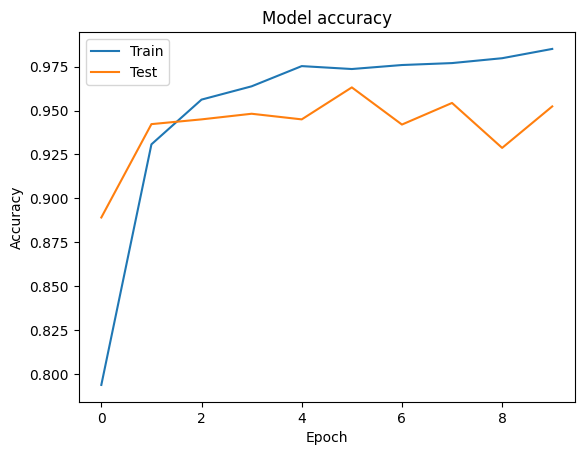

In [24]:
#visualize the loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2913
           1       0.95      0.87      0.91      1157

    accuracy                           0.95      4070
   macro avg       0.95      0.93      0.94      4070
weighted avg       0.95      0.95      0.95      4070



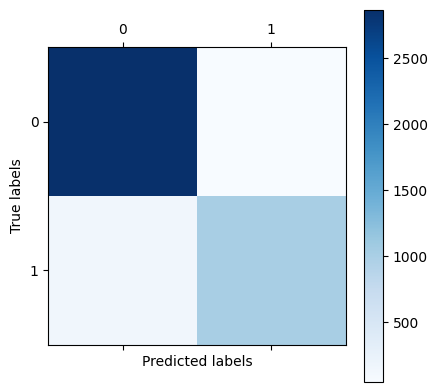

In [25]:
#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#visualize the classification report
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2865   48]
 [ 146 1011]]


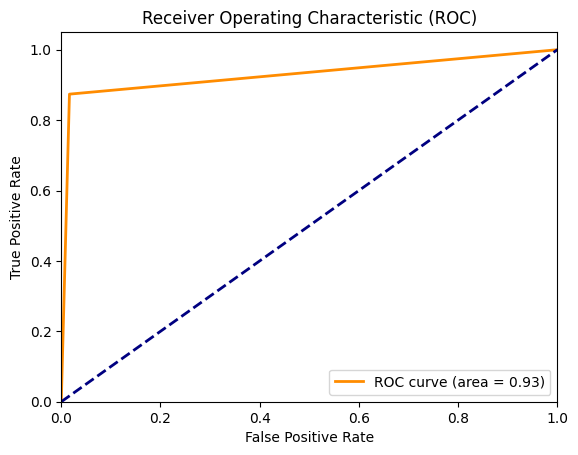

In [27]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Average Precision Score: 0.8700776268780852


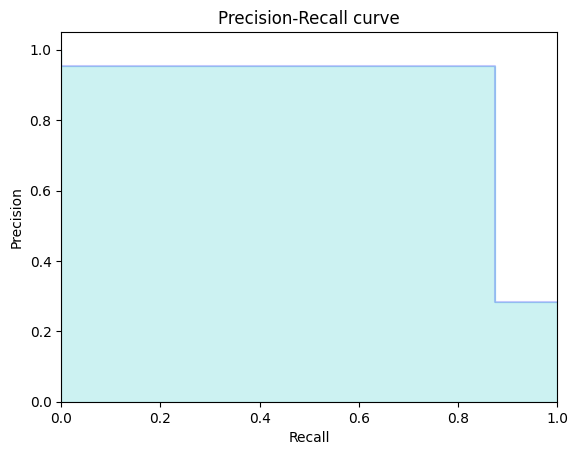

In [28]:
# average precision score
average_precision = average_precision_score(y_test, y_pred)
print("Average Precision Score:", average_precision)

# Precision-Recall curve 
# Precision: the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives
# Recall: the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives

precision, recall, thresholds = precision_recall_curve(y_test, y_pred) # Compute precision-recall pairs for different probability thresholds
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='c')
plt.xlabel('Recall') 
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

## Evaluate with user defined test sets

In [29]:
my_text="Here is an easy way to make a lot of money quick. Click here to learn more."

In [30]:
# Example of classifying a new text_message
#new_text_message = ["Your new text_message text goes here"]
new_text_message = [my_text]
new_text_message_seq = tokenizer.texts_to_sequences(new_text_message)
new_text_message_pad = pad_sequences(new_text_message_seq, maxlen=max_sequence_length)
prediction = model.predict(new_text_message_pad)


print("The text message is: ", new_text_message)
#Print the prediction (0 = ham, 1 = spam) and print the accuracy of the model
if prediction[0][0] >= 0.5:
    print("The text message is spam.")
    #print accuracy of the model
    print("At accuracy: ", accuracy)
    #print how sure it is that the text message is spam
    print("the model is ", prediction[0][0]*100, "% sure that the text message is spam.")
    
else:
    print("The text message is ham.")
    #print accuracy of the model
    print("At accuracy: ", accuracy)
    #print how sure it is that the text message is ham
    print("the model is ", (1-prediction[0][0])*100, "% sure that the text message is not spam (ham).")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The text message is:  ['Here is an easy way to make a lot of money quick. Click here to learn more.']
The text message is spam.
At accuracy:  0.9523341655731201
the model is  96.69076800346375 % sure that the text message is spam.


# Data analysis and visualization

In [31]:
# show percentage of spam and ham in the dataset
print("Percentage of spam in the dataset: ", (sum(y)/len(y))*100, "%")
print("Percentage of ham in the dataset: ", ((len(y)-sum(y))/len(y))*100, "%")

# show percentage of spam and ham in the test set
print("Percentage of spam in the test set: ", (sum(y_test)/len(y_test))*100, "%")
print("Percentage of ham in the test set: ", ((len(y_test)-sum(y_test))/len(y_test))*100, "%")

# show percentage of spam and ham in the training set
print("Percentage of spam in the training set: ", (sum(y_train)/len(y_train))*100, "%")
print("Percentage of ham in the training set: ", ((len(y_train)-sum(y_train))/len(y_train))*100, "%")

Percentage of spam in the dataset:  29.5409868291724 %
Percentage of ham in the dataset:  70.4590131708276 %
Percentage of spam in the test set:  28.42751842751843 %
Percentage of ham in the test set:  71.57248157248158 %
Percentage of spam in the training set:  29.819388131220055 %
Percentage of ham in the training set:  70.18061186877995 %


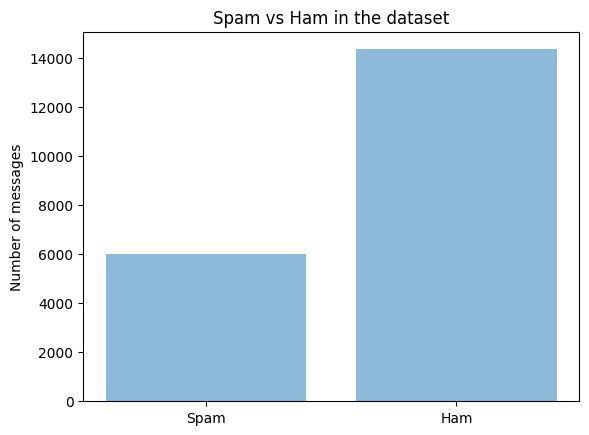

In [32]:
# show a graph of the percentage of spam and ham in the dataset
objects = ('Spam', 'Ham')
y_pos = np.arange(len(objects))
performance = [sum(y), len(y)-sum(y)]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of messages')
plt.title('Spam vs Ham in the dataset')
plt.show()

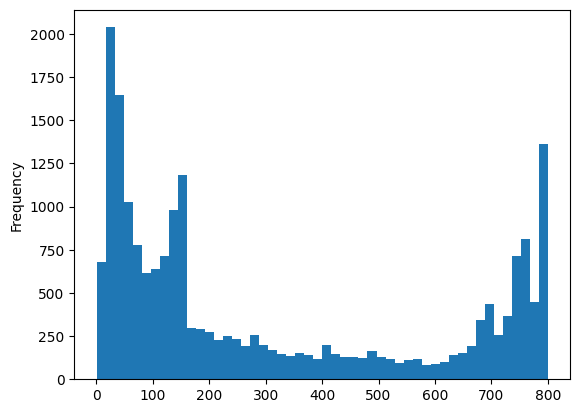

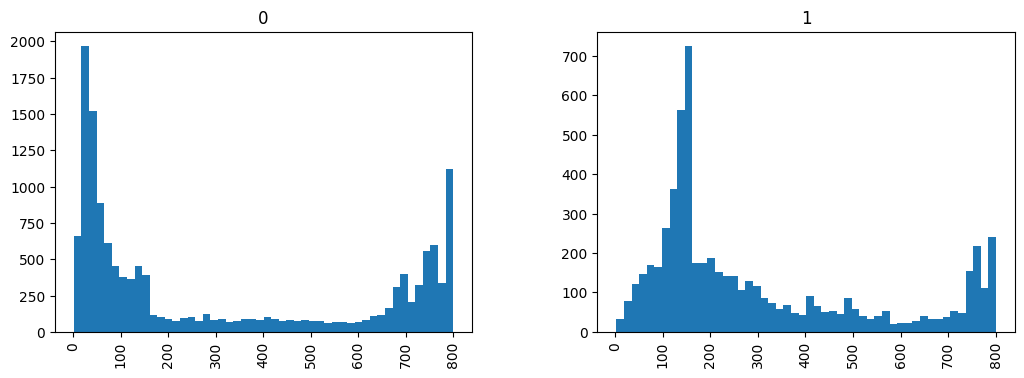

In [33]:
# visualize the length of the messages in the dataset
df['length'] = df['text'].apply(len)
df['length'].plot(bins=50, kind='hist')
plt.show()

#visualize the length of spam and ham messages in the dataset
df.hist(column='length', by='text_type', bins=50,figsize=(12,4))
plt.show()